In [1]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'first-dbt-project-test123' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=first-dbt-project-test123:US:bquxjob_2aedeb53_1990ac9f740)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2aedeb53_1990ac9f740') # Job ID inserted based on the query results selected to explore
print(job.query)

select channel,
  avg(view_to_purchase_rate) as view_to_purchase_rate
from `first-dbt-project-test123.dbt_test.metrics`
group by channel




# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2aedeb53_1990ac9f740') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df

,channel,view_to_purchase_rate
0,paid_search,0.254091
1,push,0.23
2,direct,0.203913
3,social,0.138333
4,email,0.309


In [4]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()

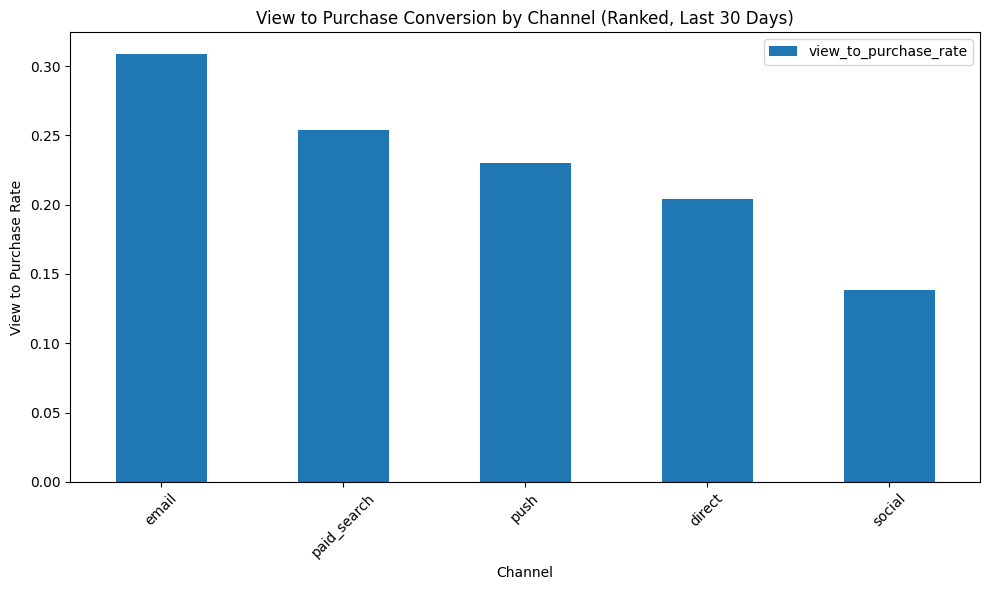

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'Category': ['A', 'B', 'C', 'D', 'E'],
        'Value1': [10, 25, 15, 30, 20],
        'Value2': [5, 12, 8, 18, 10],
        'Value3': [7, 14, 9, 22, 11],
        'Value4': [3, 9, 6, 15, 8]}
df = pd.DataFrame(data)

# Rank based on 'Value1' (descending) and sort the DataFrame
pandas_df['Rank'] = pandas_df['view_to_purchase_rate'].rank(ascending=False, method='dense')
pandas_df_ranked = pandas_df.sort_values(by='Rank')

# Create the bar plot
pandas_df_ranked.plot.bar(x='channel', y='view_to_purchase_rate', figsize=(10, 6))
plt.title('View to Purchase Conversion by Channel (Ranked, Last 30 Days)')
plt.xlabel('Channel')
plt.ylabel('View to Purchase Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()